In [1]:
import matplotlib.pyplot as plt
import skimage
import numpy as np
from skimage.data import coins

In [2]:
coins = coins()
coins

array([[ 47, 123, 133, ...,  14,   3,  12],
       [ 93, 144, 145, ...,  12,   7,   7],
       [126, 147, 143, ...,   2,  13,   3],
       ...,
       [ 81,  79,  74, ...,   6,   4,   7],
       [ 88,  82,  74, ...,   5,   7,   8],
       [ 91,  79,  68, ...,   4,  10,   7]], dtype=uint8)

In [3]:
coins.shape

(303, 384)

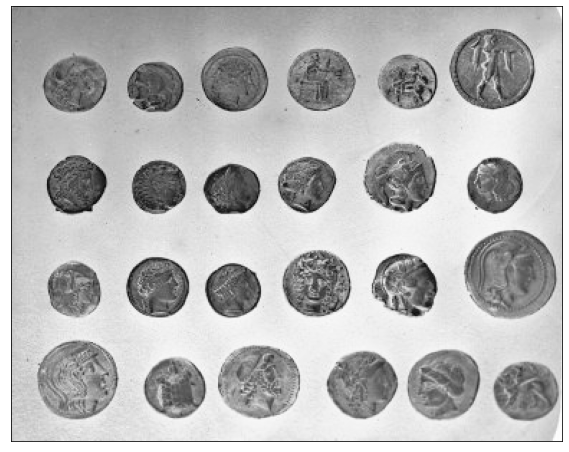

In [4]:
plt.figure(figsize=(10,8))
plt.imshow(coins, cmap= "Greys")

plt.xticks(())
plt.yticks(())

plt.show()

In [5]:
#rescaling and reducing details

from scipy.ndimage.filters import gaussian_filter
from skimage.transform import rescale

In [6]:
smoothened_coins = gaussian_filter(coins, sigma=2)

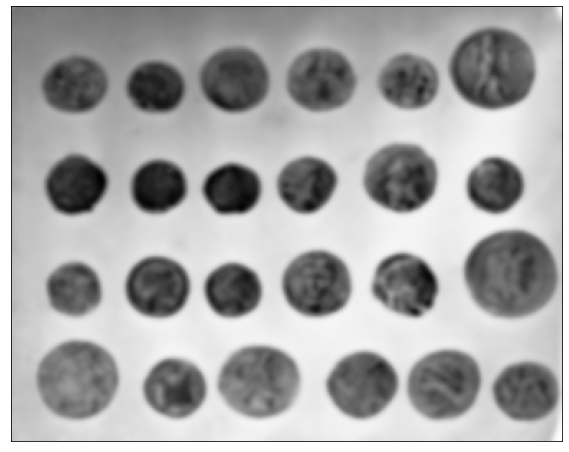

In [7]:
plt.figure(figsize=(10,8))
plt.imshow(smoothened_coins, cmap= "Greys")

plt.xticks(())
plt.yticks(())

plt.show()

In [8]:
# rescaling to 20% of the size of image

rescaled_coins = rescale(smoothened_coins, 0.2, mode= "reflect",
                        anti_aliasing= True, multichannel= False)

In [9]:
rescaled_coins.shape

(61, 77)

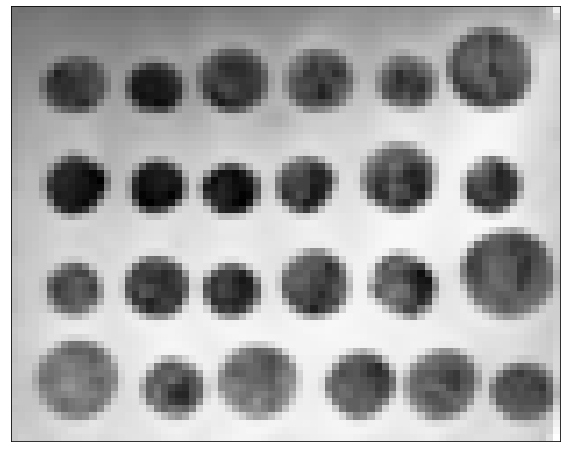

In [10]:
plt.figure(figsize=(10,8))
plt.imshow(rescaled_coins, cmap= "Greys")

plt.xticks(())
plt.yticks(())

plt.show()

In [11]:
n_clusters = 10
X = np.reshape(rescaled_coins, (-1,1))
X.shape

(4697, 1)

In [12]:
from sklearn.cluster import AgglomerativeClustering

ac = AgglomerativeClustering(n_clusters, linkage = 'average')
ac.fit(X)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='average', memory=None, n_clusters=10)

In [13]:
ac.labels_

array([2, 2, 2, ..., 1, 0, 9])

In [14]:
labels = np.reshape(ac.labels_, rescaled_coins.shape)
labels.shape

unique_labels = np.unique(labels)

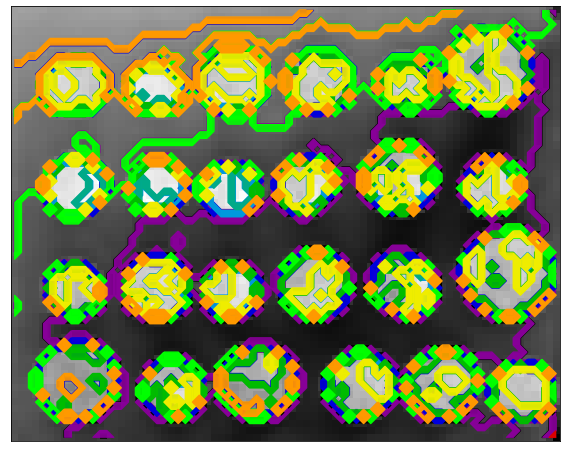

In [16]:
plt.figure(figsize=(10,8))
plt.imshow(rescaled_coins, cmap= plt.cm.gray)

for l in unique_labels:
    plt.contour(labels== l, colors= [plt.cm.nipy_spectral(l/float(n_clusters))])

plt.xticks(())
plt.yticks(())

plt.show()

In [17]:
from sklearn.feature_extraction.image import grid_to_graph

#gives pixel coneectivity graph for underlying image

connectivity = grid_to_graph(*rescaled_coins.shape)

connectivity.shape

(4697, 4697)

In [18]:
n_clusters = 27

ac = AgglomerativeClustering(n_clusters, linkage = 'ward', connectivity = connectivity)
ac.fit(X)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=<4697x4697 sparse matrix of type '<class 'numpy.int64'>'
	with 23209 stored elements in COOrdinate format>,
                        distance_threshold=None, linkage='ward', memory=None,
                        n_clusters=27)

In [20]:
labels = np.reshape(ac.labels_, rescaled_coins.shape)
labels.shape

unique_labels = np.unique(labels)

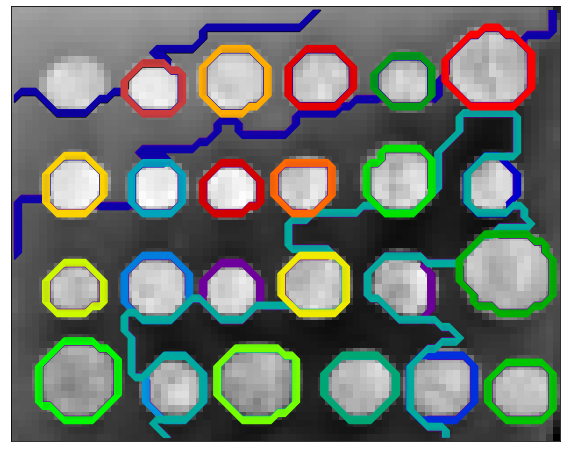

In [21]:
plt.figure(figsize=(10,8))
plt.imshow(rescaled_coins, cmap= plt.cm.gray)

for l in unique_labels:
    plt.contour(labels== l, colors= [plt.cm.nipy_spectral(l/float(n_clusters))])

plt.xticks(())
plt.yticks(())

plt.show()